<a href="https://colab.research.google.com/github/martaarozarena/KSchool-Master-Final-Project/blob/master/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
!pip install streamlit

     |████████████████████████████████| 7.1MB 2.7MB/s 
     |████████████████████████████████| 4.4MB 35.6MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 501kB 44.2MB/s 
     |████████████████████████████████| 112kB 42.9MB/s 
     |████████████████████████████████| 122kB 45.9MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73870 sha256=c266c539e0151d4e81352b1def2bf7c8b3b0d6bfc60dad1724aab9bc1d5d41ed
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for tornado: filename=tornado-6.0.4-cp36-cp36m-linux_x86_64.whl size=427634 sha256=266ae9b1fb753fa01d9e3afb693d16b8e86aaa4014bed363db9e77663386a102
  Stored in directory: /root/.cache/pip/wheels/93/84/2f/409c7b2bb3afc3aa727f7ee8787975e0793f74d1165f4d0104
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13449 sha256=7e7bea59ec97446e51d46e8db1d3aeaba0adc87e7ec553

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

plt.style.use("seaborn")                  # Establecemos el estilo gráfico de seaborn por defecto
plt.rcParams["figure.figsize"] = (15, 5)  # Tamaño por defecto de las gráficas a crear

In [ ]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'     # default for the drive
PROJ = 'My Drive/KSchool-Master-Final-Project'       # path to your project on Drive

drive.mount(ROOT)           # we mount the drive at /content/drive

PROJECT_PATH = join(ROOT, PROJ)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive/KSchool-Master-Final-Project


In [ ]:
%ls

 coviddata.ipynb                 número_vuelos.ipynb
 data/                          'Project notes.gdoc'
 DataExploration.ipynb           README.md
'Data Science Project.gslides'  'WebScrapping for codes.ipynb'


In [ ]:
%cd My Drive/KSchool-Master-Final-Project

[Errno 2] No such file or directory: 'My Drive/KSchool-Master-Final-Project'
/content/drive/My Drive/KSchool-Master-Final-Project


In [ ]:
#Adding git path:

#GIT_USERNAME = "martaarozarena" 
#GIT_TOKEN = "{YOUR_GITHUB_TOKEN}"  
#GIT_REPOSITORY = "KSchool-Master-Final-Project" 

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git"
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
GIT_PATH = 'https://github.com/martaarozarena/KSchool-Master-Final-Project.git'
print("GIT_PATH: ", GIT_PATH)

GIT_PATH:  https://github.com/martaarozarena/KSchool-Master-Final-Project.git


In [ ]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   DataExploration.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.gitignore.gdoc
	Data Science Project.gslides
	Project notes.gdoc
	WebScrapping for codes.ipynb
	coviddata.ipynb
	data/
	"nu\314\201mero_vuelos.ipynb"

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git config user.email "marta.arozarenav@gmail.com"
!git config user.name "martaarozarena"

In [ ]:
#!git add DataExploration.ipynb
#!git commit -m "exploring OpenSky data"
#!git push

[master 1e40d26] exploring OpenSky data
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite DataExploration.ipynb (94%)


[Errno 2] No such file or directory: '/content/drive/.shortcut-targets-by-id/182hJbXmDTpDtLo6Bo0aOPKfG7jSwz41k/KSchool Project/data'
/content/drive/My Drive/KSchool-Master-Final-Project


In [ ]:
!ls

 coviddata.ipynb		 número_vuelos.ipynb
 data				'Project notes.gdoc'
 DataExploration.ipynb		 README.md
'Data Science Project.gslides'	'WebScrapping for codes.ipynb'


In [ ]:
# covid_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"  Comento esto, para fijar un fichero mientras desarollamos el codigo
covid=pd.read_csv('data/owid-covid-data 20200713.csv', parse_dates=["date"])    # Dejo fijo el fichero descargado el 13 de julio. 
                                                                           # Podemos añadir index_col ="date" como parámetro dentro del read_csv
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         29947 non-null  object        
 1   continent                        29751 non-null  object        
 2   location                         30011 non-null  object        
 3   date                             30011 non-null  datetime64[ns]
 4   total_cases                      29700 non-null  float64       
 5   new_cases                        29700 non-null  float64       
 6   total_deaths                     29700 non-null  float64       
 7   new_deaths                       29700 non-null  float64       
 8   total_cases_per_million          29636 non-null  float64       
 9   new_cases_per_million            29636 non-null  float64       
 10  total_deaths_per_million         29636 non-null  float64  

In [ ]:
covid[covid['continent']=='Europe'].sample(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
9660,FRA,Europe,France,2020-01-19,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,65273512.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.980,82.66
2903,BEL,Europe,Belgium,2020-06-17,60387.0,97.0,9692.0,7.0,5210.440,8.370,836.266,0.604,851473.0,11609.0,73.469,1.002,9413.0,0.812,units unclear,50.00,11589616.0,375.564,41.8,18.571,12.849,42658.576,0.2,114.898,4.29,25.1,31.4,NaN,5.640,81.63
8751,EST,Europe,Estonia,2020-01-21,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1326539.0,31.033,42.7,19.452,13.491,29481.252,0.5,255.569,4.02,24.5,39.3,NaN,4.690,78.74
11593,GGY,Europe,Guernsey,2020-07-07,252.0,0.0,13.0,0.0,3758.277,0.000,193.879,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25193,ESP,Europe,Spain,2020-01-14,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.970,83.56
10876,GRC,Europe,Greece,2020-02-24,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10423056.0,83.479,45.3,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.210,82.24
7188,CZE,Europe,Czech Republic,2020-05-04,7781.0,26.0,248.0,3.0,726.586,2.428,23.158,0.280,273890.0,7756.0,25.576,0.724,6211.0,0.580,tests performed,54.63,10708982.0,137.176,43.3,19.027,11.580,32605.906,NaN,227.485,6.82,30.5,38.3,NaN,6.630,79.38
20485,NOR,Europe,Norway,2020-06-28,8815.0,0.0,249.0,0.0,1626.011,0.000,45.930,0.000,314323.0,791.0,57.980,0.146,3035.0,0.560,people tested,34.26,5421242.0,14.462,39.7,16.821,10.813,64800.057,0.2,114.316,5.31,19.6,20.7,NaN,3.600,82.40
28276,GBR,Europe,United Kingdom,2020-04-21,124743.0,4676.0,19051.0,559.0,1837.536,68.880,280.632,8.234,554992.0,22763.0,8.175,0.335,22726.0,0.335,tests performed,75.93,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.540,81.32
17343,MLT,Europe,Malta,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,50.0,0.283,0.113,18.0,0.041,tests performed,NaN,441539.0,1454.037,42.4,19.426,11.324,36513.323,0.2,168.711,8.83,20.9,30.2,NaN,4.485,82.53


In [ ]:
covid_eur = covid[covid['continent']=='Europe']
covid_eur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8297 entries, 186 to 29028
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         8297 non-null   object        
 1   continent                        8297 non-null   object        
 2   location                         8297 non-null   object        
 3   date                             8297 non-null   datetime64[ns]
 4   total_cases                      8211 non-null   float64       
 5   new_cases                        8211 non-null   float64       
 6   total_deaths                     8211 non-null   float64       
 7   new_deaths                       8211 non-null   float64       
 8   total_cases_per_million          8211 non-null   float64       
 9   new_cases_per_million            8211 non-null   float64       
 10  total_deaths_per_million         8211 non-null   float64 

In [ ]:
covid_eur[covid_eur['new_cases'].isnull()]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
2601,BLR,Europe,Belarus,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,0.529,NaN,NaN,NaN,tests performed,0.00,9449321.0,46.858,40.3,14.799,9.788,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.000,74.79
2604,BLR,Europe,Belarus,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,0.00,9449321.0,46.858,40.3,14.799,9.788,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.000,74.79
2605,BLR,Europe,Belarus,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,0.00,9449321.0,46.858,40.3,14.799,9.788,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.000,74.79
2606,BLR,Europe,Belarus,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,0.00,9449321.0,46.858,40.3,14.799,9.788,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.000,74.79
2607,BLR,Europe,Belarus,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,0.00,9449321.0,46.858,40.3,14.799,9.788,17167.967,NaN,443.129,5.18,10.5,46.1,NaN,11.000,74.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,SRB,Europe,Serbia,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00
23688,SRB,Europe,Serbia,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,0.010,NaN,5.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00
23690,SRB,Europe,Serbia,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,3.0,0.014,0.000,8.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00
23691,SRB,Europe,Serbia,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,7.0,0.015,0.001,8.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.00


In [ ]:
covid_eur[covid_eur['new_cases'].isnull()].shape

(86, 34)

In [ ]:
covid_eur[covid_eur['location']=='Serbia'].head(15)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
23679,SRB,Europe,Serbia,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,0.002,NaN,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23680,SRB,Europe,Serbia,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,9.0,0.004,0.001,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23681,SRB,Europe,Serbia,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0,0.004,0.001,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23682,SRB,Europe,Serbia,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,3.0,0.005,0.000,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23683,SRB,Europe,Serbia,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,3.0,0.005,0.000,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23684,SRB,Europe,Serbia,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,9.0,0.007,0.001,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23685,SRB,Europe,Serbia,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,1.0,0.007,0.000,NaN,NaN,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23686,SRB,Europe,Serbia,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,4.0,0.007,0.001,5.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23687,SRB,Europe,Serbia,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0
23688,SRB,Europe,Serbia,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,0.010,NaN,5.0,0.001,people tested,13.89,6804596.0,80.291,41.2,17.366,NaN,14048.881,NaN,439.415,10.08,37.7,40.2,97.719,5.609,76.0


In [ ]:
covid_eur.loc[:, ['new_cases']]

,new_cases
186,2.0
187,4.0
188,4.0
189,1.0
190,12.0
...,...
29024,0.0
29025,0.0
29026,0.0
29027,0.0


In [ ]:
#covid_eur.loc[:, ['new_cases']] = covid_eur['new_cases'].fillna(0)  # The NaN in the 'new_cases' series are supposed to be zero, 
                                                                    # since it was at the beginning when there were still 0 cases in those countries
                                                                    # Warning below?? Do we need to fix it?
covid_eur['new_cases'] = covid_eur['new_cases'].fillna(0)
covid_eur[covid_eur['new_cases'].isnull()].shape                    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(0, 34)

In [ ]:
covid_eur

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
186,ALB,Europe,Albania,2020-03-09,2.0,2.0,0.0,0.0,0.695,0.695,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.11,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
187,ALB,Europe,Albania,2020-03-10,6.0,4.0,0.0,0.0,2.085,1.390,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
188,ALB,Europe,Albania,2020-03-11,10.0,4.0,0.0,0.0,3.475,1.390,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
189,ALB,Europe,Albania,2020-03-12,11.0,1.0,1.0,1.0,3.822,0.347,0.347,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
190,ALB,Europe,Albania,2020-03-13,23.0,12.0,1.0,0.0,7.992,4.170,0.347,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.70,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29024,VAT,Europe,Vatican,2020-07-09,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12
29025,VAT,Europe,Vatican,2020-07-10,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12
29026,VAT,Europe,Vatican,2020-07-11,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12
29027,VAT,Europe,Vatican,2020-07-12,12.0,0.0,0.0,0.0,14833.127,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12


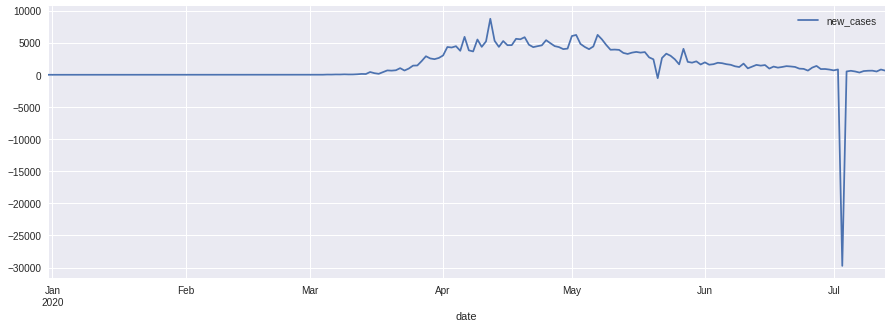

In [ ]:
covid_eur[covid_eur['location'].isin(['United Kingdom'])].plot(x = 'date', y = 'new_cases');  # Keep in mind we need to "fix" the UK series at some point

#From Our World in Data:
#United Kingdom - May 20, July 3:methodologychange
#France - June 2:methodology change
#Spain - April 19 & May25:methodology change
#Italy - June 25:methodology change

In [ ]:
cov_eur_dates = covid_eur[covid_eur['date']<'2020-06-30']    

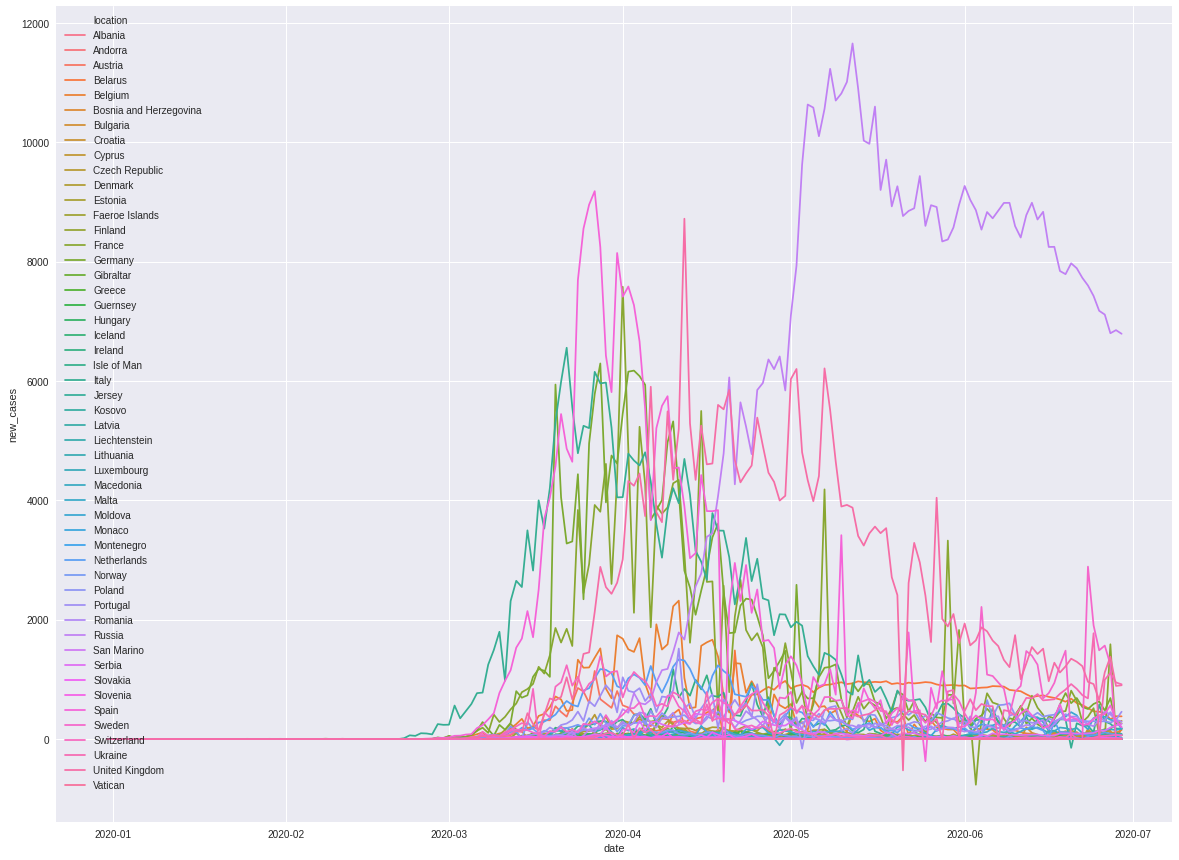

In [ ]:
plt.figure(figsize = (20,15))
sns.lineplot(x = cov_eur_dates['date'], y = cov_eur_dates['new_cases'], hue = cov_eur_dates['location'], data=cov_eur_dates)

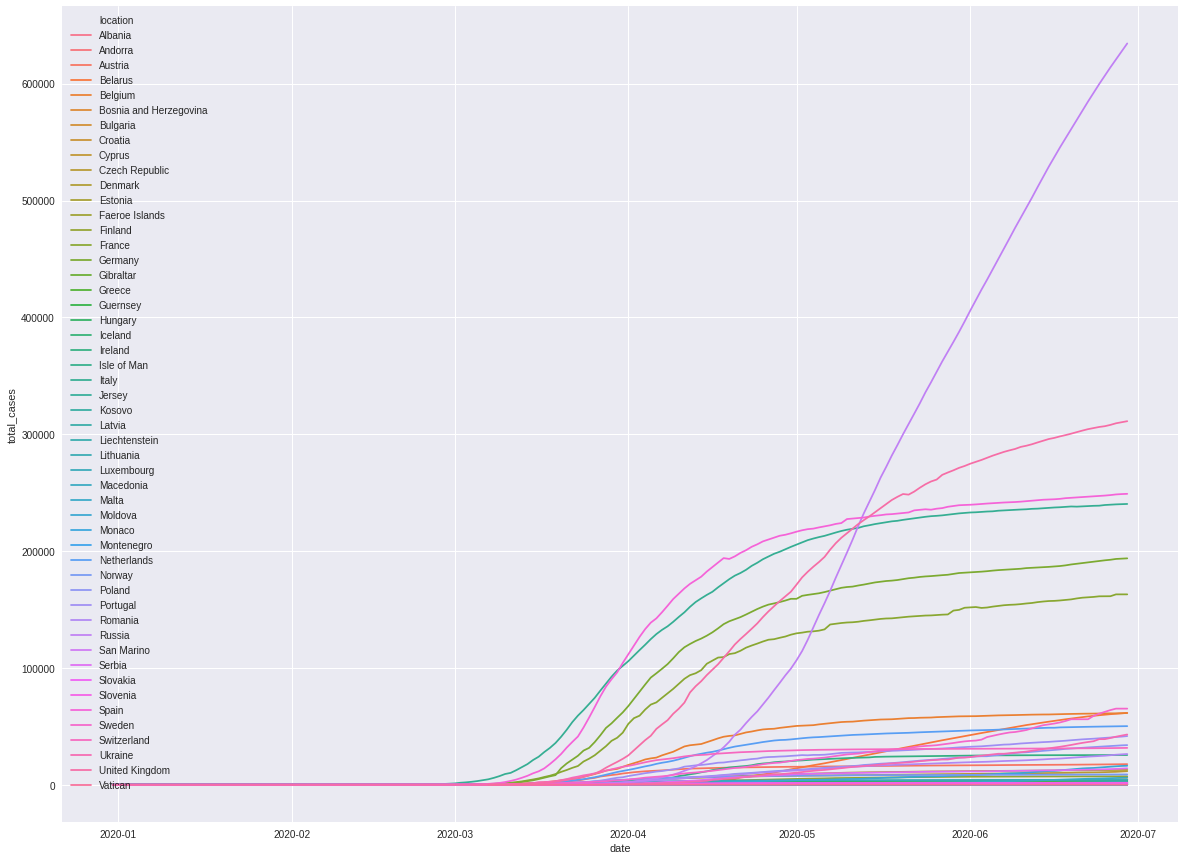

In [ ]:
plt.figure(figsize = (20,15))
sns.lineplot(x = cov_eur_dates['date'], y = cov_eur_dates['total_cases'], hue = cov_eur_dates['location'], data=cov_eur_dates)

In [ ]:
#cogemos España como primer pais para el modelo

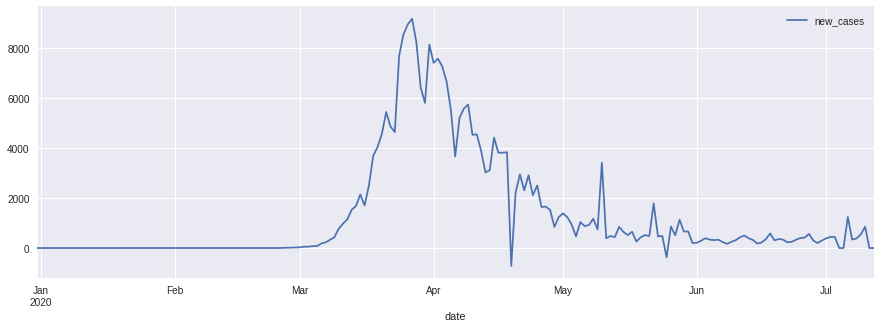

In [ ]:
covid_eur[covid_eur['location'].isin(['Spain'])].plot(x = 'date', y = 'new_cases');

In [ ]:
covid_eur[(covid_eur['new_cases']<0) & (covid_eur['location']=="Spain")] #numero de casos negativos 2

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25289,ESP,Europe,Spain,2020-04-19,193252.0,-713.0,20453.0,410.0,4133.310,-15.250,437.453,8.769,NaN,NaN,NaN,NaN,NaN,NaN,tests performed,85.19,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25325,ESP,Europe,Spain,2020-05-25,235400.0,-372.0,26834.0,-1918.0,5034.779,-7.956,573.931,-41.023,NaN,NaN,NaN,NaN,44188.0,0.945,tests performed,75.46,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


In [ ]:
covid_eur[(covid_eur['new_cases']==0) & (covid_eur['location']=="Spain")]#los días con 0 casos tienen sentido, antes de la pandemia y 
#en julio que hubo días de 0 casos

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
25179,ESP,Europe,Spain,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25180,ESP,Europe,Spain,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25181,ESP,Europe,Spain,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25182,ESP,Europe,Spain,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25183,ESP,Europe,Spain,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25184,ESP,Europe,Spain,2020-01-05,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25185,ESP,Europe,Spain,2020-01-06,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25186,ESP,Europe,Spain,2020-01-07,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25187,ESP,Europe,Spain,2020-01-08,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
25188,ESP,Europe,Spain,2020-01-09,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


In [ ]:
#seleccionar solo españa y resetear el indice
covid_esp=covid_eur[covid_eur["location"]=="Spain"].reset_index()

In [ ]:
#quitar los negativos si no hacemos moving average
#indices que queremos cambiar porque casos no pueden ser menores de 0
indexes=covid_esp[(covid_esp["new_cases"]<0) &(covid_esp["location"]=="Spain")].index.values
#sustituir por la media de valores anterior y posterior
for i in indexes:
  covid_esp.iloc[i,6]= (covid_esp.iloc[i+1,6]+covid_esp.iloc[i-1,6])/2

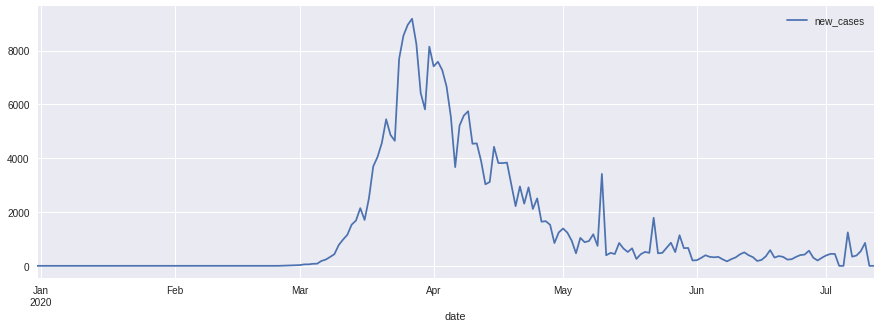

In [ ]:
covid_esp.plot(x = 'date', y = 'new_cases');

In [ ]:
covid_esp.describe()

,index,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.300000e+01,0.0,13.000000,0.0,81.000000,81.000000,188.000000,195.0,1.950000e+02,195.0,1.950000e+02,1.950000e+02,1.950000e+02,195.0,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,0.0,1.950000e+02,1.950000e+02
mean,25276.000000,121240.184615,1326.617949,13237.476923,145.656410,2593.107631,27.849395,283.125621,3.115333,2.442964e+06,NaN,52.250462,NaN,34566.913580,0.739346,46.435319,46754783.0,9.310500e+01,45.5,1.943600e+01,1.379900e+01,3.427236e+04,1.0,9.940300e+01,7.170000e+00,2.740000e+01,3.140000e+01,NaN,2.970000e+00,8.356000e+01
std,56.435804,109979.581880,2142.549166,12703.108827,303.425987,2352.263755,45.917959,271.696444,6.489760,1.007672e+06,NaN,21.552221,NaN,9141.513051,0.195550,33.500773,0.0,3.276910e-13,0.0,4.986602e-14,1.780929e-14,9.483092e-11,0.0,1.139795e-13,6.233252e-15,3.561858e-14,7.836088e-14,NaN,1.424743e-14,1.709692e-13
min,25179.000000,0.000000,0.000000,0.000000,-1918.000000,0.000000,-15.250000,0.000000,-41.023000,9.302300e+05,NaN,19.896000,NaN,10529.000000,0.225000,0.000000,46754783.0,9.310500e+01,45.5,1.943600e+01,1.379900e+01,3.427236e+04,1.0,9.940300e+01,7.170000e+00,2.740000e+01,3.140000e+01,NaN,2.970000e+00,8.356000e+01
25%,25227.500000,2.000000,0.000000,0.000000,0.000000,0.043000,0.000000,0.000000,0.000000,1.625211e+06,NaN,34.760000,NaN,27674.000000,0.592000,11.110000,46754783.0,9.310500e+01,45.5,1.943600e+01,1.379900e+01,3.427236e+04,1.0,9.940300e+01,7.170000e+00,2.740000e+01,3.140000e+01,NaN,2.970000e+00,8.356000e+01
50%,25276.000000,142398.000000,363.000000,12418.000000,2.000000,3045.635000,7.293000,265.598000,0.043000,2.536234e+06,NaN,54.245000,NaN,37048.000000,0.792000,57.410000,46754783.0,9.310500e+01,45.5,1.943600e+01,1.379900e+01,3.427236e+04,1.0,9.940300e+01,7.170000e+00,2.740000e+01,3.140000e+01,NaN,2.970000e+00,8.356000e+01
75%,25324.500000,235586.000000,1456.000000,27133.500000,199.000000,5038.757000,28.136000,580.336500,4.256500,3.290388e+06,NaN,70.375000,NaN,42350.000000,0.906000,81.940000,46754783.0,9.310500e+01,45.5,1.943600e+01,1.379900e+01,3.427236e+04,1.0,9.940300e+01,7.170000e+00,2.740000e+01,3.140000e+01,NaN,2.970000e+00,8.356000e+01
max,25373.000000,253908.000000,9181.000000,28752.000000,1179.000000,5430.632000,196.365000,614.953000,25.217000,3.849701e+06,NaN,82.338000,NaN,45087.000000,0.964000,85.190000,46754783.0,9.310500e+01,45.5,1.943600e+01,1.379900e+01,3.427236e+04,1.0,9.940300e+01,7.170000e+00,2.740000e+01,3.140000e+01,NaN,2.970000e+00,8.356000e+01


In [ ]:
covid_esp.head()

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,25179,ESP,Europe,Spain,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
1,25180,ESP,Europe,Spain,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2,25181,ESP,Europe,Spain,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
3,25182,ESP,Europe,Spain,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
4,25183,ESP,Europe,Spain,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,46754783.0,93.105,45.5,19.436,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


In [ ]:
covid_esp.index = covid_esp.date

In [ ]:
covid_esp_newcases=covid_esp["new_cases"]

In [ ]:
covid_esp_newcases

date
2019-12-31      0.0
2020-01-01      0.0
2020-01-02      0.0
2020-01-03      0.0
2020-01-04      0.0
              ...  
2020-07-08    383.0
2020-07-09    543.0
2020-07-10    852.0
2020-07-11      0.0
2020-07-12      0.0
Name: new_cases, Length: 195, dtype: float64

In [ ]:
covid_esp_newcases=covid_esp_newcases.resample('D').sum()
covid_esp_newcases

date
2019-12-31      0.0
2020-01-01      0.0
2020-01-02      0.0
2020-01-03      0.0
2020-01-04      0.0
              ...  
2020-07-08    383.0
2020-07-09    543.0
2020-07-10    852.0
2020-07-11      0.0
2020-07-12      0.0
Freq: D, Name: new_cases, Length: 195, dtype: float64

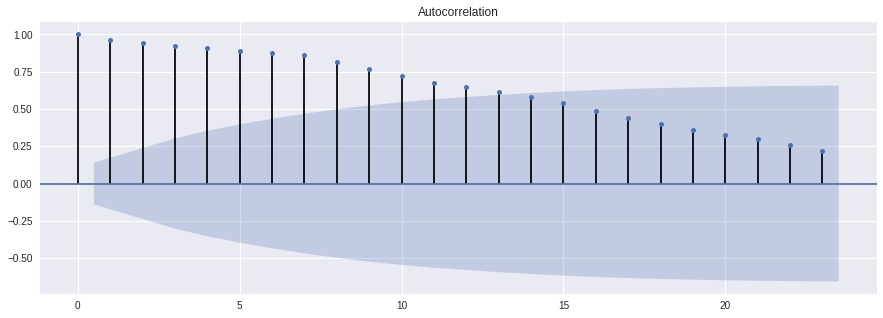

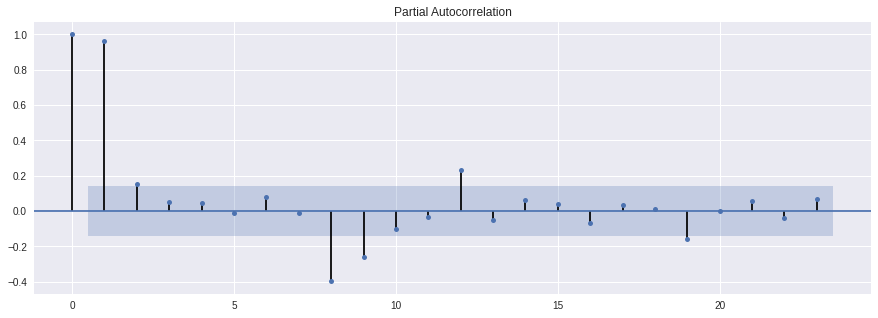

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf
plot_acf(covid_esp_newcases, unbiased=True)
pyplot.show()
#la autocorrelacion mide como se repite la funcion con el tiempo
#es normal que la autocorrelacion este toda dentro del cono de no confianza porque tenemos muy pocos datos y además la logica dice que 
#tendrian que repetirse anualmente, en primavera mas casos que en verano o en invierno más que en verano etc pero no en un intervalo de 3 meses
plot_pacf(covid_esp_newcases, method="ywm")
pyplot.show()

In [ ]:
#metodo 2, usar moving averages
covid_esp=covid_eur[covid_eur["location"]=="Spain"].reset_index()
covid_esp["MA7"]=covid_esp.new_cases.rolling(7).mean()
covid_esp.index = covid_esp.date
covid_esp_ma7=covid_esp["MA7"]


In [ ]:
covid_esp_ma7

date
2019-12-31           NaN
2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
                 ...    
2020-07-08    407.714286
2020-07-09    421.857143
2020-07-10    480.428571
2020-07-11    480.428571
2020-07-12    480.428571
Name: MA7, Length: 195, dtype: float64

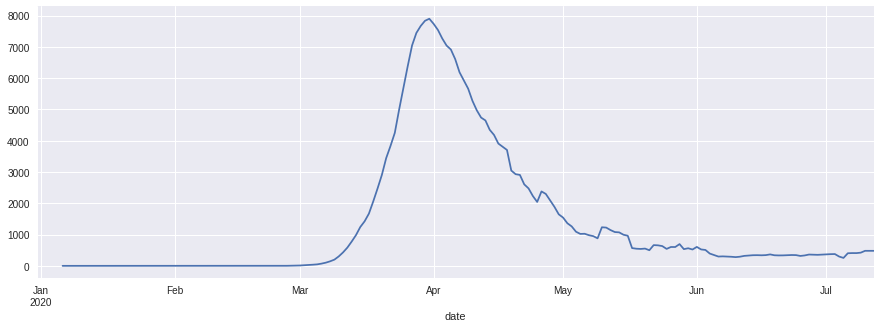

In [ ]:
covid_esp_ma7.plot()

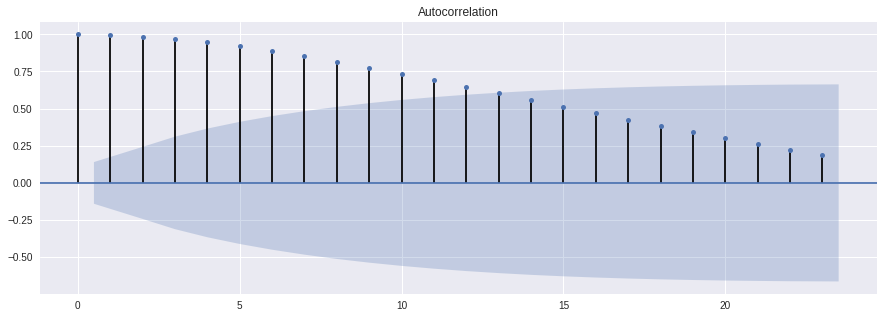

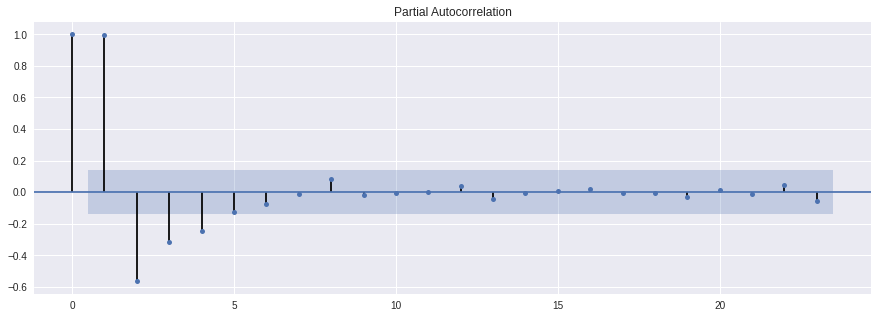

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(covid_esp_ma7.fillna(0))
pyplot.show()
#la autocorrelacion mide como se repite la funcion con el tiempo
#es normal que la autocorrelacion este toda dentro del cono de no confianza porque tenemos muy pocos datos y además la logica dice que 
#tendrian que repetirse anualmente, en primavera mas casos que en verano o en invierno más que en verano etc pero no en un intervalo de 3 meses
plot_pacf(covid_esp_ma7.fillna(0), method="ywm")
pyplot.show()

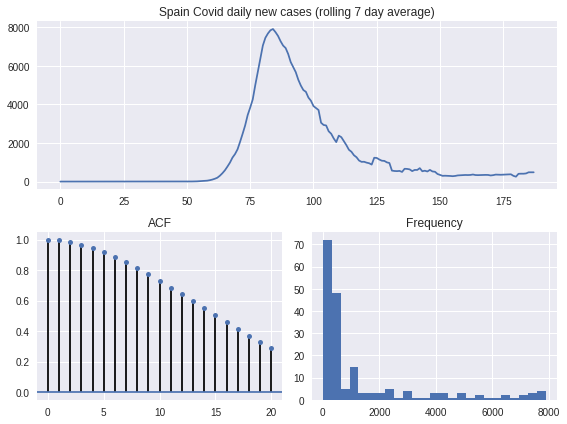

In [ ]:
import pmdarima as pm
from pmdarima import preprocessing

# Let's look at the series, its ACF plot, and a histogram of its values
pm.tsdisplay(covid_esp_ma7[7:], lag_max=20, title="Spain Covid daily new cases (rolling 7 day average)", show=True)

In [ ]:
covid_esp_ma7[covid_esp_ma7<=0]

In [ ]:
covid_esp_ma7['2020-02-25':].head()

date
2020-02-25    0.142857
2020-02-26    1.000000
2020-02-27    2.142857
2020-02-28    4.714286
2020-02-29    7.428571
Name: MA7, dtype: float64

In [ ]:
from scipy.stats import boxcox

covid_esp_ma7_bc, lam = boxcox(covid_esp_ma7['2020-02-25':])
print('Lambda: %f' % lam)

Lambda: 0.211257


In [ ]:
# The boxcox() function takes an argument, called lambda, that controls the type of transform to perform.
#Below are some common values for lambda

#lambda = -1. is a reciprocal transform.
#lambda = -0.5 is a reciprocal square root transform.
#lambda = 0.0 is a log transform.
#lambda = 0.5 is a square root transform.
#lambda = 1.0 is no transform.

# From https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/ 

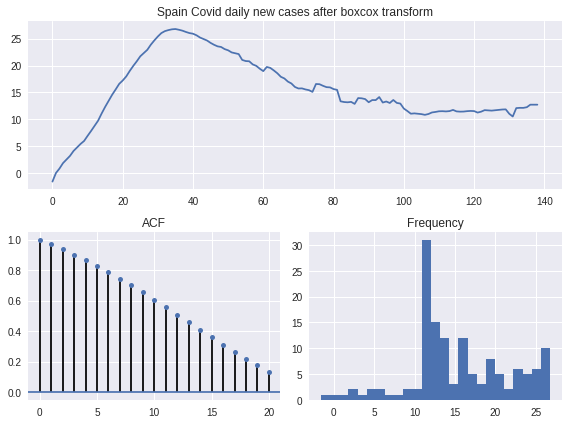

In [ ]:
pm.tsdisplay(covid_esp_ma7_bc, lag_max=20, title="Spain Covid daily new cases after boxcox transform", show=True)

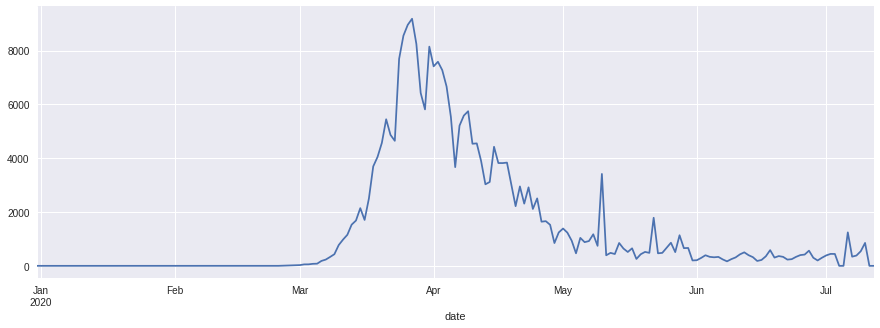

In [ ]:
covid_esp_newcases.plot()

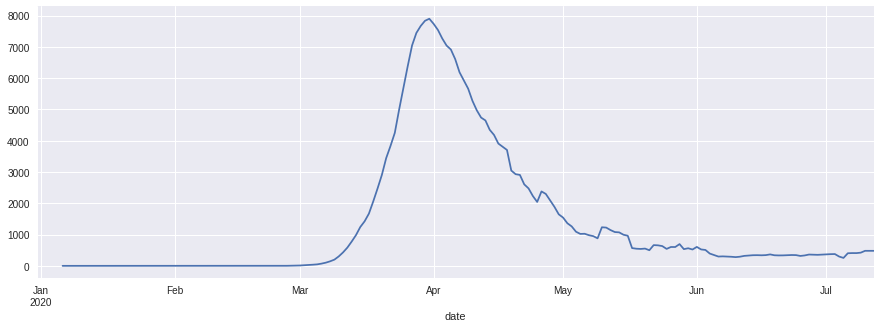

In [ ]:
covid_esp_ma7.plot()

In [ ]:
covid_esp_diff = covid_esp_newcases - covid_esp_ma7

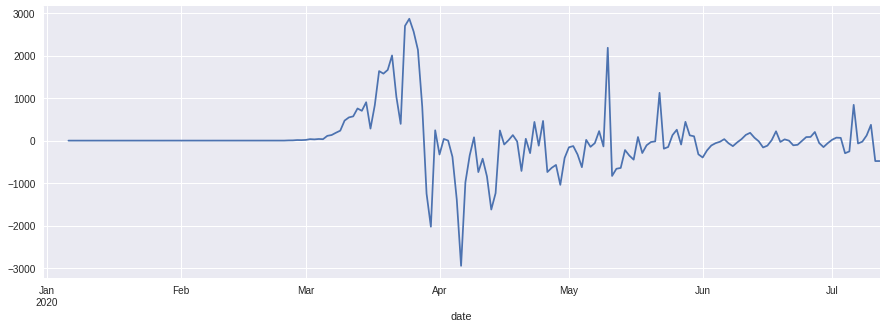

In [ ]:
covid_esp_diff.plot()

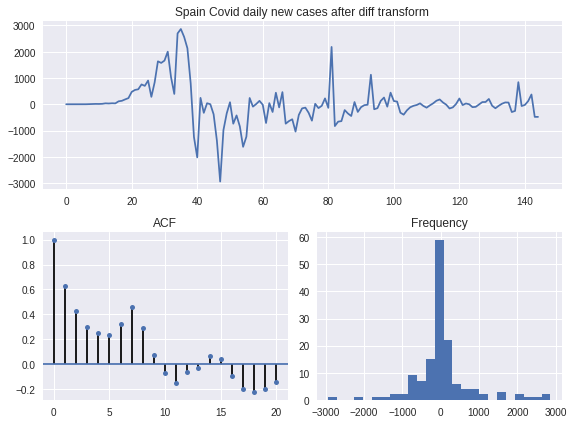

In [ ]:
pm.tsdisplay(covid_esp_diff[50:], lag_max=20, title="Spain Covid daily new cases after diff transform", show=True)

In [ ]:
# Perform Dicky-Fuller test

# from http://sayef.tech/post/time-series-analysis-in-python-inroduction-to-arima/

from statsmodels.tsa.stattools import adfuller

print('Result of Dicky=Fuller Test')
dftest = adfuller(covid_esp_diff[7:], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Result of Dicky=Fuller Test
Test Statistic           -3.206191
p-value                   0.019629
#Lags Used               11.000000
#Observations Used      176.000000
Critical Value (1%)      -3.468062
Critical Value (5%)      -2.878106
Critical Value (10%)     -2.575602
dtype: float64


In [ ]:
from pmdarima import arima
n_diffs = arima.ndiffs(covid_esp_newcases)
n_diffs

1

In [ ]:
#el test de dicky-fuller solo analiza tendencia
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    # Determining rolling statistics
    rolling_mean = timeseries.rolling(window=3).mean()
    rolling_std = timeseries.rolling(window=3).std()

    # Plot rolling statistics

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Result of Dicky=Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

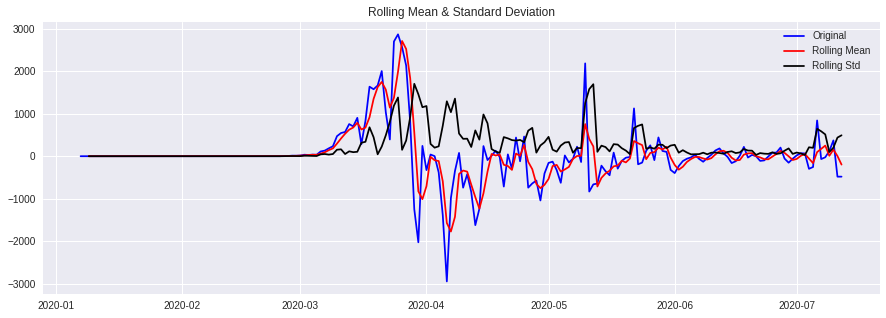

Result of Dicky=Fuller Test
Test Statistic           -3.206191
p-value                   0.019629
#Lags Used               11.000000
#Observations Used      176.000000
Critical Value (1%)      -3.468062
Critical Value (5%)      -2.878106
Critical Value (10%)     -2.575602
dtype: float64


In [ ]:
test_stationarity(covid_esp_diff[7:])

In [ ]:
covid_esp_s1 = covid_esp_newcases - covid_esp_newcases.shift(1)

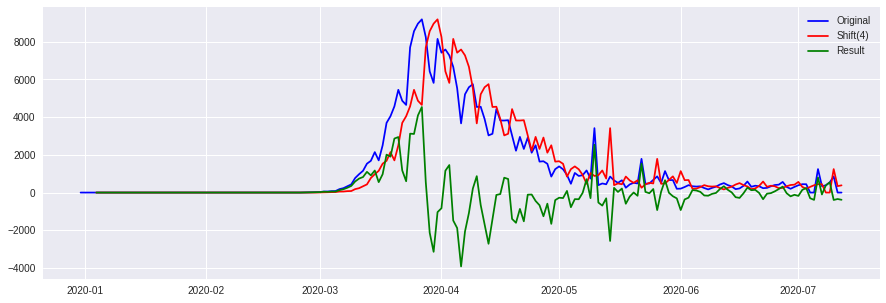

In [ ]:
plt.plot(covid_esp_newcases, color='blue', label='Original')
plt.plot(covid_esp_newcases.shift(4), color='red', label='Shift(4)')
covid_esp_diff4 = covid_esp_newcases - covid_esp_newcases.shift(4)
plt.plot(datadiff, color = 'green', label='Result')
plt.legend(loc='best')
plt.show()

In [ ]:
covid_esp_diff4.head()

date
2019-12-31    NaN
2020-01-01    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    0.0
Freq: D, Name: new_cases, dtype: float64

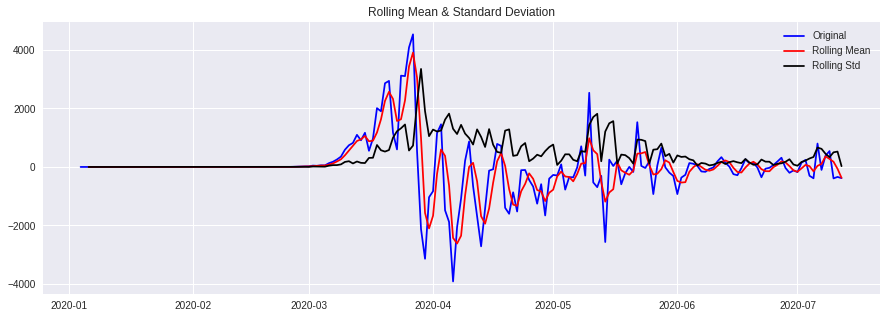

Result of Dicky=Fuller Test
Test Statistic           -3.616116
p-value                   0.005460
#Lags Used                7.000000
#Observations Used      183.000000
Critical Value (1%)      -3.466598
Critical Value (5%)      -2.877467
Critical Value (10%)     -2.575260
dtype: float64


In [ ]:
test_stationarity(covid_esp_diff4[4:])

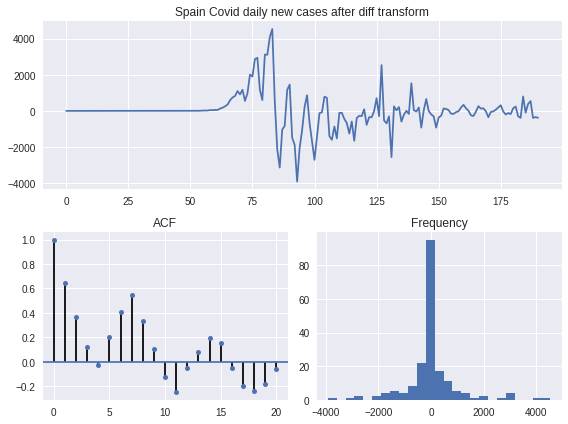

In [ ]:
pm.tsdisplay(covid_esp_diff4[4:], lag_max=20, title="Spain Covid daily new cases after diff transform", show=True)

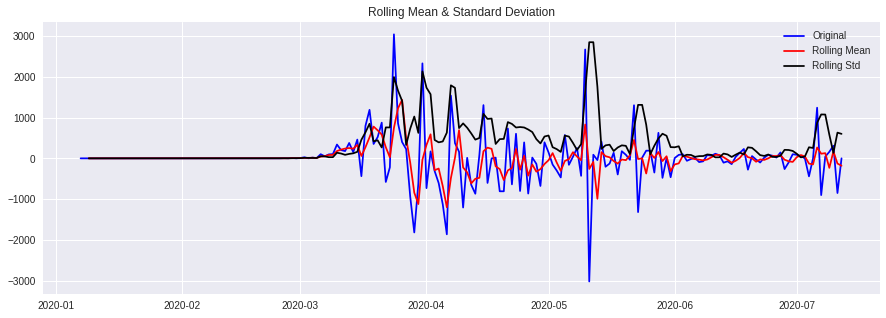

Result of Dicky=Fuller Test
Test Statistic           -3.203309
p-value                   0.019794
#Lags Used               10.000000
#Observations Used      177.000000
Critical Value (1%)      -3.467845
Critical Value (5%)      -2.878012
Critical Value (10%)     -2.575551
dtype: float64


In [ ]:
test_stationarity(covid_esp_s1[7:])

In [ ]:
covid_esp_logminusma = np.log(covid_esp_newcases[80:]) - covid_esp_ma7[80:]

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
covid_esp_logminusma = np.log(covid_esp_newcases['2020-02-25':'2020-06-30']) - covid_esp_newcases['2020-02-25':'2020-06-30']

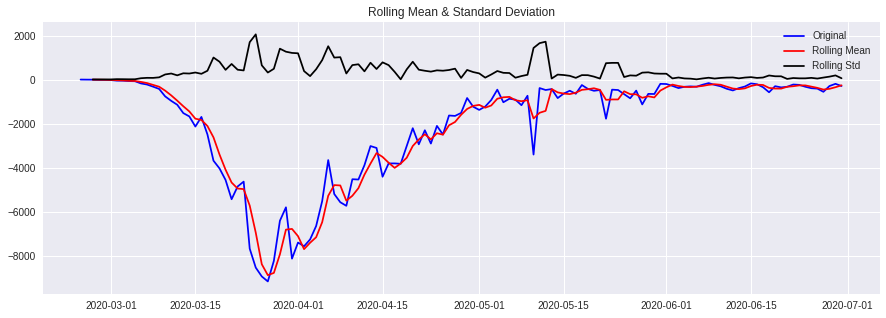

Result of Dicky=Fuller Test
Test Statistic           -2.003512
p-value                   0.285035
#Lags Used               11.000000
#Observations Used      115.000000
Critical Value (1%)      -3.488535
Critical Value (5%)      -2.887020
Critical Value (10%)     -2.580360
dtype: float64


In [ ]:
test_stationarity(covid_esp_logminusma)

In [ ]:
covid_esp["MA3"]=covid_esp.new_cases.rolling(3).mean()
covid_esp.index = covid_esp.date
covid_esp_ma3=covid_esp["MA3"]

covid_esp_diff3 = covid_esp_newcases - covid_esp_ma3

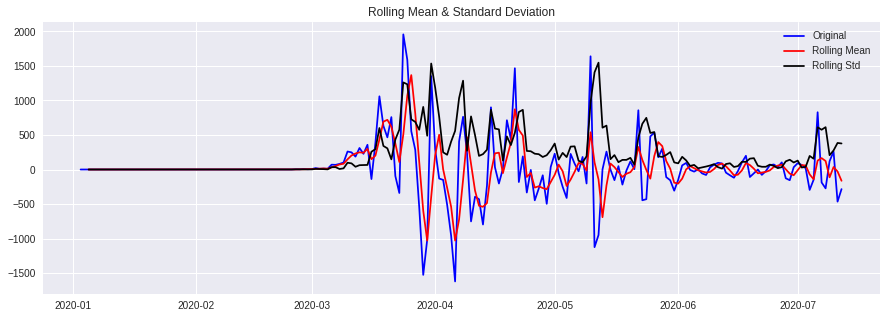

Result of Dicky=Fuller Test
Test Statistic           -4.207494
p-value                   0.000640
#Lags Used               12.000000
#Observations Used      179.000000
Critical Value (1%)      -3.467420
Critical Value (5%)      -2.877826
Critical Value (10%)     -2.575452
dtype: float64


In [ ]:
test_stationarity(covid_esp_diff3[3:])

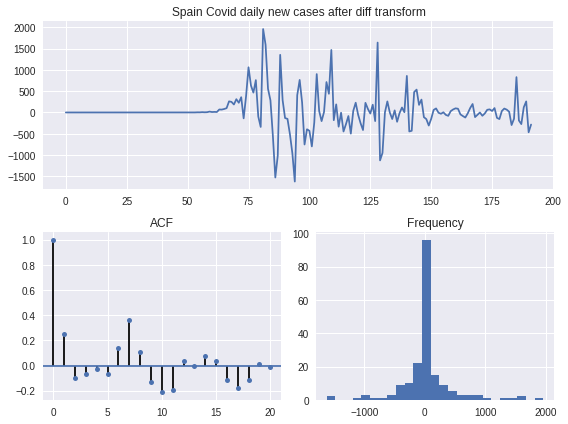

In [ ]:
pm.tsdisplay(covid_esp_diff3[3:], lag_max=20, title="Spain Covid daily new cases after diff transform", show=True)

In [ ]:
# https://alkaline-ml.com/pmdarima/auto_examples/index.html#preprocessing-examples

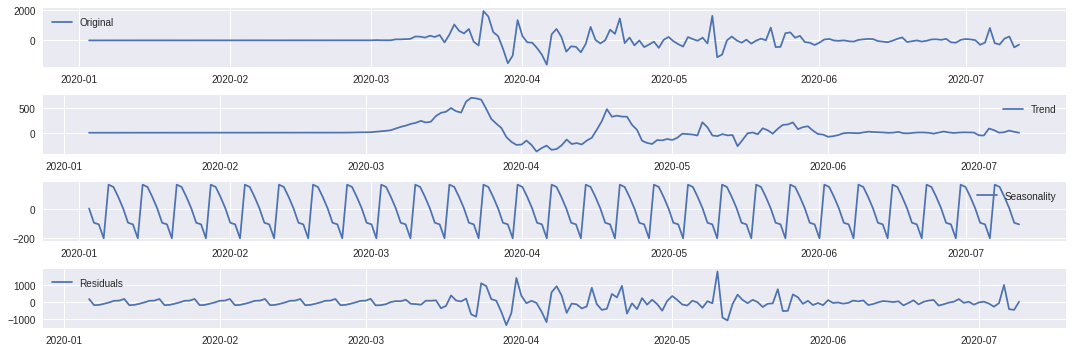

In [ ]:
#Once data is stationary then time to decompose data in trend seasonality and residual 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(covid_esp_diff3[3:])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(covid_esp_diff3[3:], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


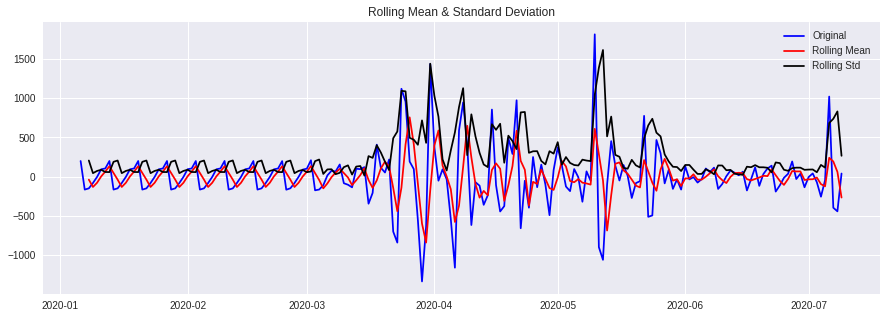

Result of Dicky=Fuller Test
Test Statistic         -6.110775e+00
p-value                 9.344566e-08
#Lags Used              1.500000e+01
#Observations Used      1.700000e+02
Critical Value (1%)    -3.469413e+00
Critical Value (5%)    -2.878696e+00
Critical Value (10%)   -2.575917e+00
dtype: float64


In [ ]:
decomposed_data = residual
decomposed_data.dropna(inplace=True)
test_stationarity(decomposed_data)

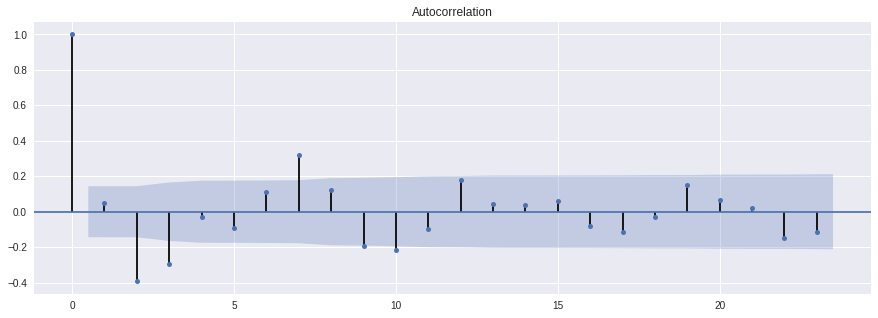

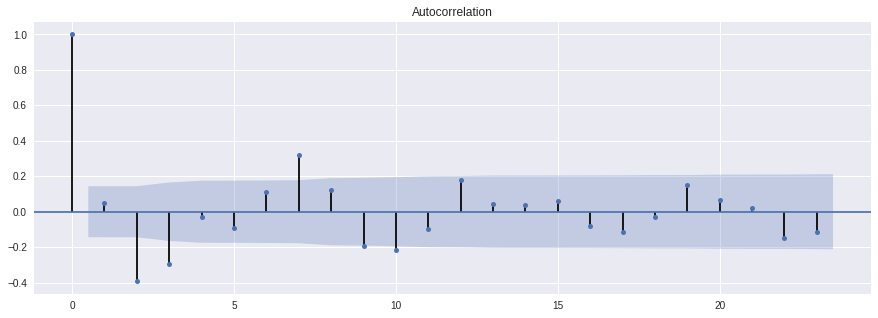

In [ ]:
plot_acf(decomposed_data)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


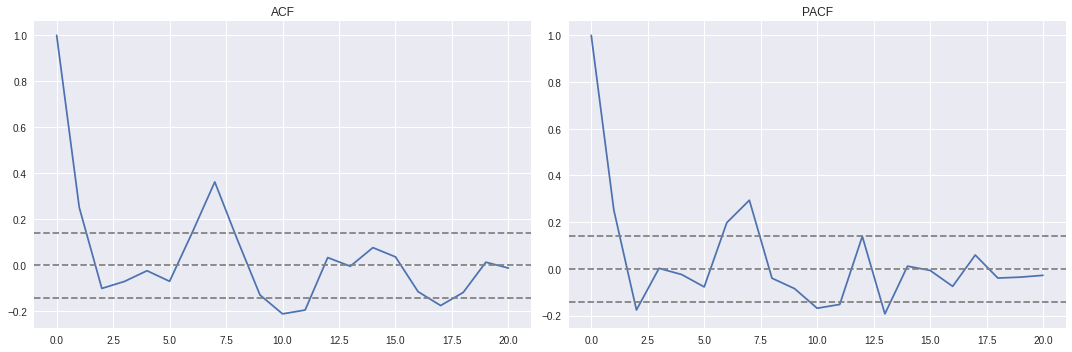

In [ ]:
#to calculate P and q de manera visual
# ACF and PACF plots|:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(covid_esp_diff3[3:], nlags=20)
lag_pacf = pacf(covid_esp_diff3[3:], nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(covid_esp_diff3[3:])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(covid_esp_diff3[3:])), linestyle='--', color='gray')
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(covid_esp_diff3[3:])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(covid_esp_diff3[3:])), linestyle='--', color='gray')
plt.title('PACF')
plt.tight_layout()

In [ ]:
# in both graphs the line cuts for the first time around 2 then p and q are 2

In [ ]:
#forma de buscar los mejores valores de p q y d con un bucle que compara AICs (valor que evalua la calidad del modelo. 0 sería perfecto)
#según esto lo mejor es modelo 4,0,4 es decir p=4 y q=4 
best_aic = 999999
for p in range(5):
    for q in range(5):
        for d in range(3):
            try:
                modelt = SARIMAX(covid_esp_diff3, order = (p, d, q)).fit()
                if modelt.aic < best_aic:
                    best_aic = modelt.aic
                    print(p, d, q, modelt.aic, modelt.bic)
            except:
                pass

0 0 0 2885.8690485806883 2889.142048139252
0 0 1 2871.0458656063574 2877.591864723485


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2 0 2 2863.186870161716 2879.551867954535


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

4 0 4 2855.8841610669597 2885.3411570940334


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#de manera automatica sale 4,0,4

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


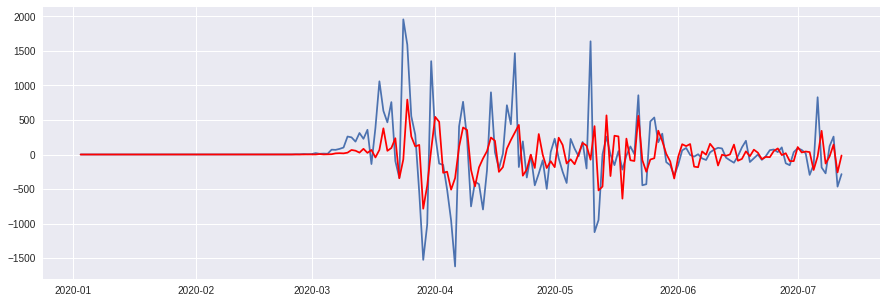

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#ARIMAX Model
model1 = SARIMAX(covid_esp_diff3[3:], order=(4, 0, 4))
results_SARIMAX = model1.fit()
plt.plot(covid_esp_diff3[3:])
plt.plot(results_SARIMAX.fittedvalues, color='red')

In [ ]:
results_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -1412.354
Date:                Mon, 20 Jul 2020   AIC                           2842.708
Time:                        14:59:32   BIC                           2872.025
Sample:                    01-03-2020   HQIC                          2854.582
                         - 07-12-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1141      0.079     -1.445      0.148      -0.269       0.041
ar.L2         -0.5239      0.081     -6.481      0.000      -0.682      -0.365
ar.L3         -0.2731      0.075     -3.633      0.000      -0.420      -0.126
ar.L4         -0.7242      0.064    -11.348      0.000      -0.849      -0.599
ma.L1          0.4417      0.085      5.183      0.000       0.275       0.609
ma.L2          0.6192      0.091      6.824      0.000       0.441       0.797
ma.L3          0.3328      0.075      4.436      0.000       0.186       0.480
ma.L4          0.8911      0.075     11.872      0.000       0.744       1.038
sigma2      1.581e+05   1.12e+04     14.176      0.000    1.36e+05     1.8e+05
===================================================================================
Ljung-Box (Q):                       51.15   Jarque-Bera (JB):               566.04
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):            1820.12   Skew:                             1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction= results_SARIMAX.get_forecast(steps=12)
prediction.predicted_mean

2020-07-13     42.212412
2020-07-14    -49.311747
2020-07-15    124.841031
2020-07-16    -34.276930
2020-07-17    -78.592191
2020-07-18     28.545963
2020-07-19    -43.132680
2020-07-20     36.252776
2020-07-21     67.578000
2020-07-22    -35.598545
2020-07-23    -10.003390
2020-07-24    -24.916694
Freq: D, dtype: float64

In [ ]:
prediction.conf_int() #con un 95% de seguridad el valor de 13 de julio está entre -866 y 756 ........

,lower y,upper y
2020-07-13,-737.522739,821.947562
2020-07-14,-869.674468,771.050974
2020-07-15,-696.752656,946.434718
2020-07-16,-860.994090,792.440229
2020-07-17,-906.632812,749.448431
2020-07-18,-813.713847,870.805773
2020-07-19,-885.514410,799.249050
2020-07-20,-817.062104,889.567657
2020-07-21,-785.736330,920.892330
2020-07-22,-890.056306,818.859216


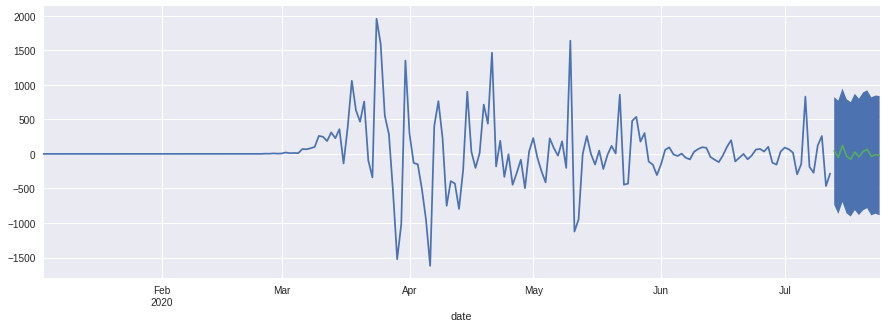

In [ ]:
covid_esp_diff3[3:].plot()
prediction.predicted_mean.plot()
plt.fill_between(prediction.predicted_mean.index,prediction.conf_int()["lower y"],prediction.conf_int()["upper y"])
plt.show()

In [ ]:
results_SARIMAX.fittedvalues

date
2020-01-03      0.000000
2020-01-04      0.000000
2020-01-05      0.000000
2020-01-06      0.000000
2020-01-07      0.000000
                 ...    
2020-07-08   -130.777480
2020-07-09    -27.775683
2020-07-10    143.745175
2020-07-11   -259.239320
2020-07-12    -14.435258
Freq: D, Length: 192, dtype: float64

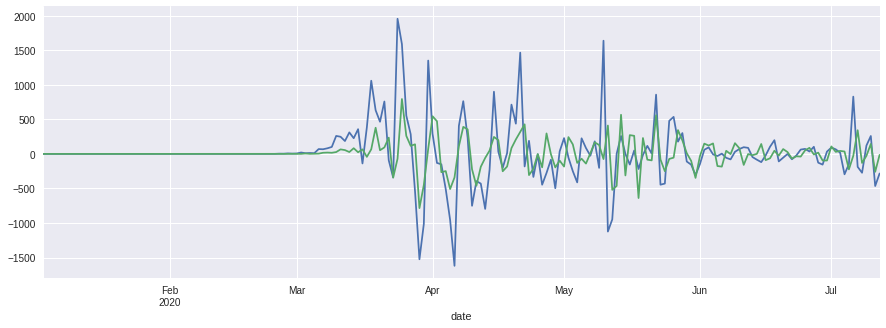

In [ ]:
covid_esp_diff3[3:].plot()
results_SARIMAX.fittedvalues.plot()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(covid_esp_diff3[3:],results_SARIMAX.fittedvalues)

140372.10123103976

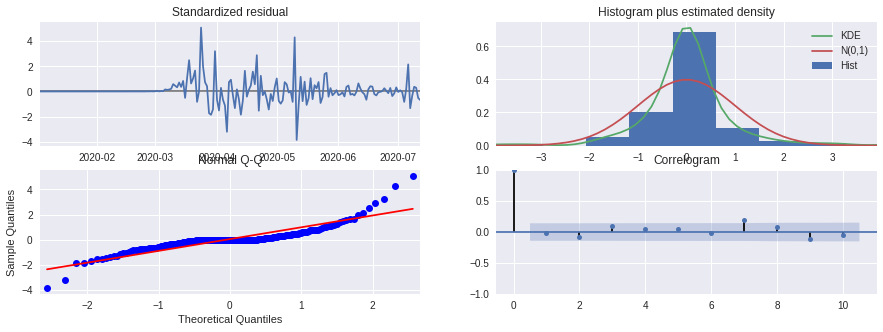

In [ ]:
results_SARIMAX.plot_diagnostics()
plt.show();

In [ ]:
##Prueba con la funcion automatica de pmdarima. sale un q=1 es decir modelo AM puro
model2=pm.auto_arima(covid_esp_diff3[3:],seasonal=False , suppress_warnings=True)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  192
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1426.398
Date:                Mon, 20 Jul 2020   AIC                           2858.796
Time:                        14:59:34   BIC                           2868.568
Sample:                             0   HQIC                          2862.754
                                - 192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.4624     40.870      0.501      0.617     -59.641     100.566
ma.L1          0.3176      0.038      8.335      0.000       0.243       0.392
sigma2      1.657e+05   8341.654     19.860      0.000    1.49e+05    1.82e+05
===================================================================================
Ljung-Box (Q):                       77.26   Jarque-Bera (JB):               469.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             574.40   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(model2.order)

(0, 0, 1)


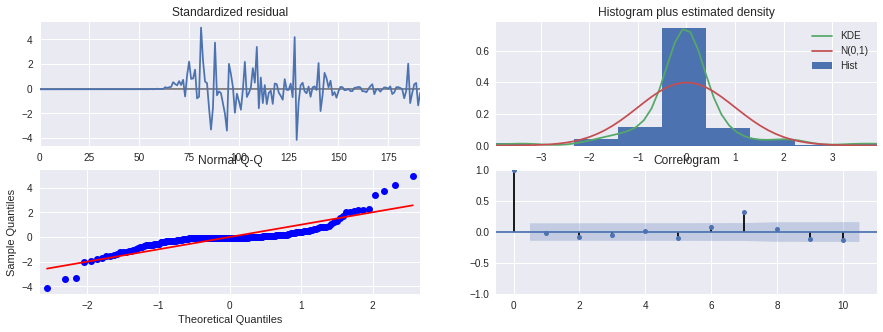

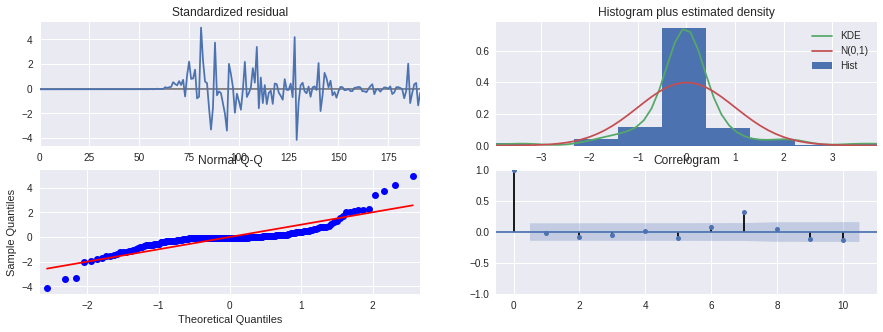

In [ ]:
model2.plot_diagnostics()

In [ ]:
#Ahora habría que deshacer el cambio
#covid_esp_diff3 = covid_esp_newcases - covid_esp_ma3
#covid_esp_newcases= covid_esp_diff3+covid_esp_ma3

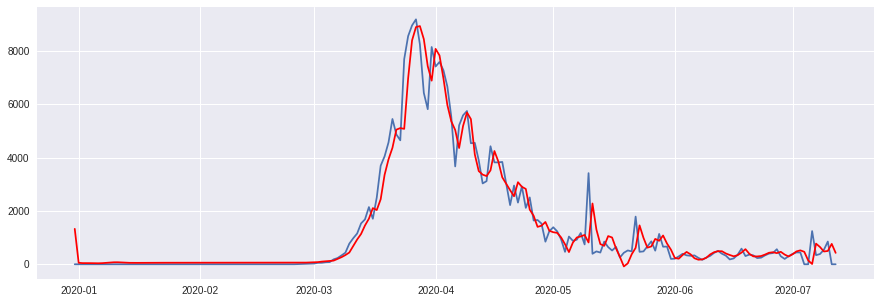

In [ ]:
#covid_esp["MA3"]=covid_esp.new_cases.rolling(3).mean()
#covid_esp.index = covid_esp.date
#covid_esp_ma3=covid_esp["MA3"]

#covid_esp_diff3 = covid_esp_newcases - covid_esp_ma3

from statsmodels.tsa.arima_model import ARIMA

model3 = ARIMA(covid_esp_newcases, order=(4, 0, 4))
results_ARIMA = model3.fit()
plt.plot(covid_esp_newcases)
plt.plot(results_ARIMA.fittedvalues, color='red')


In [ ]:
prediction3 = results_ARIMA.forecast(steps=12)
prediction3

(array([226.26141467, 281.88811959, 323.15739618, 281.98532268,
        167.92198313,  53.17511852,  15.16534691,  80.1277555 ,
        207.16819376, 320.78406488, 365.28458587, 341.26476192]),
 array([ 514.78273426,  598.5255451 ,  682.88777558,  751.93720766,
         816.30312171,  894.7977942 , 1000.41487611, 1126.70966288,
        1250.02854235, 1350.13765284, 1423.97973841, 1481.62667484]),
 array([[ -782.69420435,  1235.21703369],
        [ -891.20039264,  1454.97663181],
        [-1015.27804944,  1661.5928418 ],
        [-1191.78452298,  1755.75516834],
        [-1432.00273589,  1767.84670215],
        [-1700.59633156,  1806.9465686 ],
        [-1945.61177986,  1975.94247368],
        [-2128.18260478,  2288.43811577],
        [-2242.84272889,  2657.17911641],
        [-2325.43710887,  2967.00523862],
        [-2425.66441613,  3156.23358787],
        [-2562.6701593 ,  3245.19968314]]))

In [ ]:
covid_esp_newcases.shape

(195,)

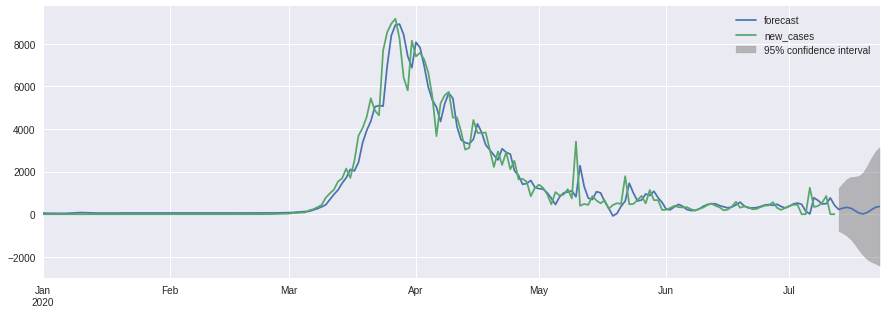

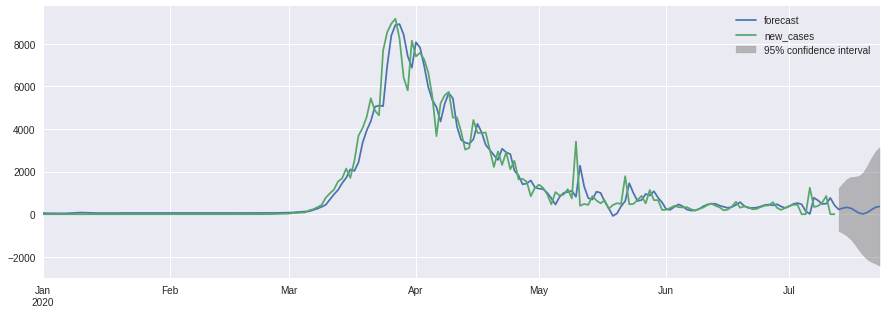

In [ ]:
prediction3 = results_ARIMA.forecast(steps=12)

results_ARIMA.plot_predict(1,205)

In [ ]:
#probamos con 1 variable exogena
#ARIMAX Model
flights_esp = pd.read_csv("vuelos_esp.csv",parse_dates=["FLT_DATE"],index_col="FLT_DATE")
flights_esp=flights_esp["FLT_ARR_1"]
flights_esp=flights_esp.resample("1D").sum()
flights_esp
#solo hay vuelos hasta 31-5-2020 y el modelo covid va hasta 12-7-2020

FileNotFoundError: ignored

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model4 = SARIMAX(covid_esp_diff3[3:-12], order=(4, 0, 4),exog=flights_esp[2:])
results_SARIMAX = model4.fit()
plt.plot(covid_esp_diff3[3:-12])
plt.plot(results_SARIMAX.fittedvalues, color='red')

In [ ]:
prediction4= results_SARIMAX.get_forecast(steps=12,exog=[688,553,616,630,612,688,553,616,630,612,688,533])# poner por dia de la semana

In [ ]:
covid_esp_diff3[3:-12].plot()
prediction4.predicted_mean.plot()
plt.fill_between(prediction4.predicted_mean.index,prediction4.conf_int()["lower y"],prediction4.conf_int()["upper y"])
plt.show()

In [ ]:
covid_esp.new_cases[1:-12]

In [ ]:
prediction4.predicted_mean

In [ ]:
(200+301+x)/3=146.52=-61,55

In [ ]:
#covid_esp_diff3 = covid_esp_newcases - covid_esp_ma3
# 146.53=x-(200+301+x/)3
covid_esp_bucle=covid_esp.new_cases.copy()
covid_esp_bucle=covid_esp_bucle[:-12]
fecha=covid_esp_bucle.index[-1]
j=1
covid_esp_bucle
  


In [ ]:

for i in  prediction4.predicted_mean:
  inicial_2=covid_esp_bucle[-2]
  inicial_1=covid_esp_bucle[-1]
  x=(-inicial_2-inicial_1-(3*i))/-2
  covid_esp_bucle.append(pd.Series(x,index=fecha,))
  j=j+1

In [ ]:
plt.plot(covid_esp_bucle[-15:],color="blue")
plt.plot(covid_esp.new_cases[-15:],color="red")

In [ ]:
covid_esp.new_cases[-15:]

In [ ]:
covid_esp_bucle[-15:]

In [ ]:
### Creating a front end visualization

In [ ]:
pip install tornado==5.0

In [ ]:
import streamlit as st

     |████████████████████████████████| 512kB 3.5MB/s 
  Created wheel for tornado: filename=tornado-5.0-cp36-cp36m-linux_x86_64.whl size=448216 sha256=05281c623a3a05e0c183db14c52b0439503c6bceb5df851f29ac74de1adaf2a9
  Stored in directory: /root/.cache/pip/wheels/34/fc/01/27b203030e619266c40efa4ad2cc5432e7027743dddc0391ef
Successfully built tornado
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.3 which is incompatible.
  Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4


In [ ]:

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"



--2020-07-20 14:24:07--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 100.24.239.43, 52.207.47.153, 52.200.98.137, ...
Connecting to bin.equinox.io (bin.equinox.io)|100.24.239.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.13M  37.6MB/s    in 0.3s    

2020-07-20 14:24:08 (37.6 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13773305/13773305]

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
https://93611df74b17.ngrok.io


In [ ]:

!streamlit hello




  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.71.107.174:8501

  Ready to create your own Python apps super quickly?
  Just head over to https://docs.streamlit.io

  May you create awesome apps!

  Stopping...
  Stopping...


In [ ]:
st.title("Coronavirus deaths forecast ")
st.markdown("explain text of what this visualization makes")

SyntaxError: ignored